In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cases = pd.read_csv("cases.csv")
cases.head()

,Report Date,Case Status,Sex,Age group,DHB,Overseas travel,Historical
0,26-02-20,Confirmed,Female,60 to 69,Auckland,Yes,NaN
1,02-03-20,Confirmed,Female,30 to 39,Waitemata,Yes,NaN
2,04-03-20,Confirmed,Male,40 to 49,Counties Manukau,No,NaN
3,04-03-20,Confirmed,Male,40 to 49,Waitemata,Yes,NaN
4,05-03-20,Probable,Female,70 to 79,Waitemata,Yes,NaN


In [3]:
cases["Year"] = "20" + cases["Report Date"].str[6:]
cases["Year"] = cases["Year"].astype('int')
cases["Month"] = cases["Report Date"].str[3:5]
cases["Month"] = cases["Month"].astype("int")
cases.iloc[:,[0,7,8,1,2,3,4,5,6]]

,Report Date,Year,Month,Case Status,Sex,Age group,DHB,Overseas travel,Historical
0,26-02-20,2020,2,Confirmed,Female,60 to 69,Auckland,Yes,NaN
1,02-03-20,2020,3,Confirmed,Female,30 to 39,Waitemata,Yes,NaN
2,04-03-20,2020,3,Confirmed,Male,40 to 49,Counties Manukau,No,NaN
3,04-03-20,2020,3,Confirmed,Male,40 to 49,Waitemata,Yes,NaN
4,05-03-20,2020,3,Probable,Female,70 to 79,Waitemata,Yes,NaN
...,...,...,...,...,...,...,...,...,...
4090,20-09-21,2021,9,Confirmed,Male,0 to 9,Counties Manukau,No,NaN
4091,20-09-21,2021,9,Confirmed,Male,0 to 9,Auckland,No,NaN
4092,21-09-21,2021,9,Confirmed,Male,10 to 19,Counties Manukau,No,NaN
4093,21-09-21,2021,9,Confirmed,Female,40 to 49,Waitemata,Unknown,NaN


Number of cases by Year and Month

In [4]:
case_number = cases.groupby(["Year","Month"]).size().to_frame("Cases")
case_number

Cases
Year Month       
2020 2          1
     3        743
     4        741
     5         20
     6         24
     7         34
     8        186
     9         95
     10       121
     11       102
     12       107
2021 1        139
     2         74
     3        120
     4        115
     5         54
     6         72
     7        126
     8        768
     9        453

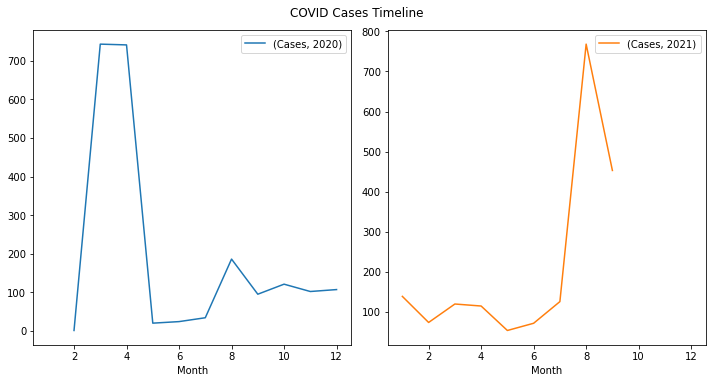

In [5]:
ax = case_number.unstack(level=0).plot(kind='line', subplots=True, rot=0, figsize=(10, 10), layout=(2,2), title="COVID Cases Timeline")
plt.tight_layout()

In [6]:
dhb_cases = cases.groupby("DHB").size().to_frame("Cases")
dhb_cases

,Cases
DHB,
Auckland,416
Bay of Plenty,48
Canterbury,168
Capital and Coast,113
Counties Manukau,908
Hawke's Bay,44
Hutt Valley,24
Lakes,16
Managed Isolation & Quarantine,1269


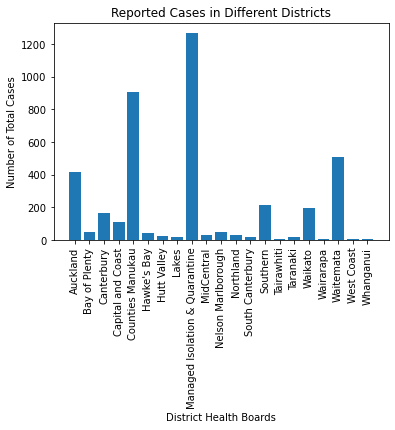

In [7]:
dhb = [dhb for dhb, df in cases.groupby("DHB")]

plt.bar(dhb,dhb_cases["Cases"])
plt.xticks(dhb, rotation="vertical")
plt.ylabel("Number of Total Cases")
plt.xlabel("District Health Boards")
plt.title("Reported Cases in Different Districts")
plt.show()

In [8]:
age_group = cases.groupby("Age group").size().to_frame("Number of Cases")
age_group

,Number of Cases
Age group,
0 to 9,356
10 to 19,508
20 to 29,1002
30 to 39,717
40 to 49,537
50 to 59,515
60 to 69,289
70 to 79,126
80 to 89,35


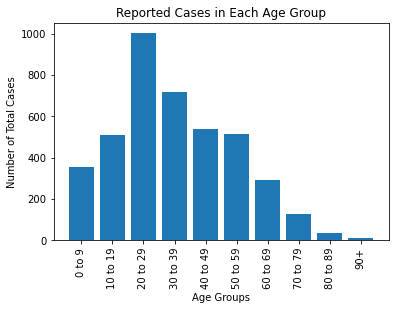

In [9]:
age = [age for age, df in cases.groupby("Age group")]

plt.bar(age,age_group["Number of Cases"])
plt.xticks(age, rotation="vertical")
plt.ylabel("Number of Total Cases")
plt.xlabel("Age Groups")
plt.title("Reported Cases in Each Age Group")
plt.show()